In [1]:
from signal_utils import *

# Real Signal

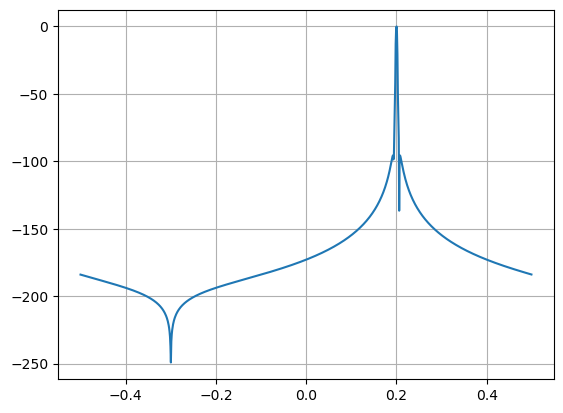

In [54]:
N = 2**10
n = np.arange(N)

perc = 0.15
Fmax = 0.5 * (1 - perc)

F = 0.2

xi_test = 1.0 * np.cos(2*np.pi*F*n)
xq_test = 1.0 * np.sin(2*np.pi*F*n)

np.savetxt("../../../../VHDL/data/delay_test/xin_i_test.txt", xi_test, fmt="%.12f")
np.savetxt("../../../../VHDL/data/delay_test/xin_q_test.txt", xq_test, fmt="%.12f")

xiq_test = xi_test + 1j*xq_test
freqs_test, xfftdB_test, an_ = fftdB(xiq_test, True)
plt.figure()
plt.plot(freqs_test, xfftdB_test)
plt.grid()
plt.show()

In [45]:
k3 = np.array([0.5, 0.0, -0.5])
k5 = np.array([-1, 8, 0, -8, +1]) / 12.0
k7 = np.array([1, -9, +45, 0, -45, +9, -1]) / 60.0
k9 = np.array([-1, 12, -39, +56, 0, -56, +39, -12, +1]) / 280.0

np.savetxt("../../../../VHDL/data/delay_test/k3.txt", k3, fmt="%.12f")
np.savetxt("../../../../VHDL/data/delay_test/k5.txt", k5, fmt="%.12f")
np.savetxt("../../../../VHDL/data/delay_test/k7.txt", k7, fmt="%.12f")

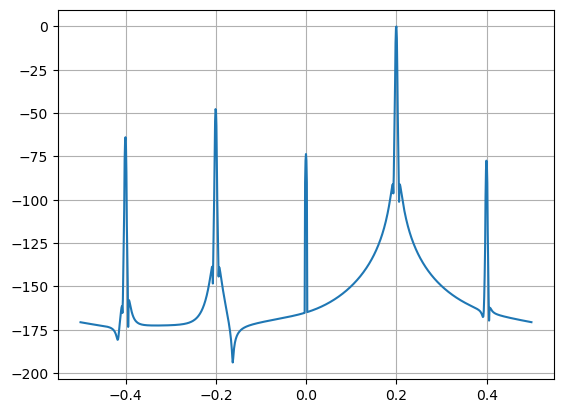

In [55]:
xout_i_test = np.loadtxt("../../../../VHDL/data/delay_test/xout_i_test.txt", dtype=np.int32)
xout_q_test = np.loadtxt("../../../../VHDL/data/delay_test/xout_q_test.txt", dtype=np.int32)
xout_iq_test = xout_i_test + 1j*xout_q_test

freq_test, xfftdB_test, an = fftdB(xout_iq_test, True)
plt.figure()
plt.plot(freq_test, xfftdB_test)
# plt.ylim([-95, 5])
plt.grid()

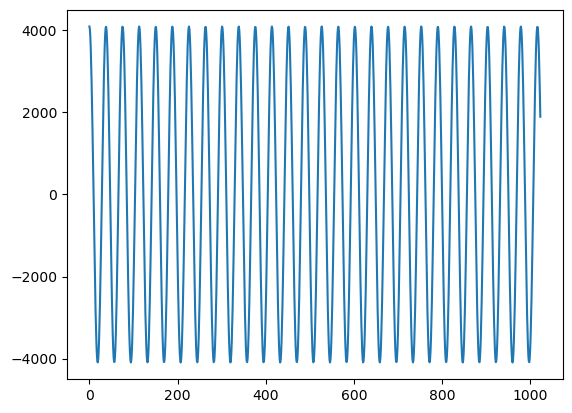

In [48]:
plt.figure()
plt.plot(xi_test*2**12)
# plt.plot(xout_test)